### Multi Layer Perceptron Regression 
This will use the mulit layer perceptron regression to construct a model on a training set, then perform analysis on the test data for performance evaluation.
https://scikit-learn.org/stable/modules/neural_networks_supervised.html

Optimize alpha

DXG - 2021-09-25

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import confusion_matrix

In [3]:
# User defined function for accuracy
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [4]:
# Load dataset
dataset = pd.read_csv('../featureSelectedDataset.csv')  
dataset.head()

,"Adolescent fertility rate (births per 1,000 women ages 15-19)",Arable land (% of land area),Arable land (hectares per person),"Birth rate, crude (per 1,000 people)",CO2 emissions from solid fuel consumption (% of total),Crop production index (2004-2006 = 100),Livestock production index (2004-2006 = 100),Permanent cropland (% of land area),"Population, female (% of total)",Rural population (% of total population),"Life expectancy at birth, total (years)",Year,CountryName,MeanLifeExpetancyOverall,MeanLifeExpetancyForYear,AboveAverageLifeExpectancyOverall,AboveAverageLifeExpectancyByYear
0,145.3210,11.947431,0.801756,51.614,35.807860,73.15,48.66,0.111816,48.634625,90.574,34.092878,1964,Afghanistan,64.193563,55.937218,False,False
1,46.6478,4.605392,3.168264,20.500,61.654161,34.23,61.43,0.021999,49.604197,16.890,70.880976,1964,Australia,64.193563,55.937218,True,True
2,56.3066,20.065391,0.229381,18.500,48.662900,93.29,72.46,0.811334,53.270334,35.038,69.921951,1964,Austria,64.193563,55.937218,True,True
3,88.5072,8.691025,0.378911,45.799,0.000000,18.74,35.63,0.709471,52.189871,88.199,39.136854,1964,Benin,64.193563,55.937218,False,False
4,100.5586,1.237884,0.336018,43.539,0.247525,24.62,20.76,0.126465,50.360061,62.043,43.430220,1964,Bolivia,64.193563,55.937218,False,False


In [5]:
# Split the dataset into features and obs

X = dataset.iloc[:,0:10]
y = dataset["Life expectancy at birth, total (years)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# Fit the model and get accuracy
clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=20000)

mlp = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [7]:
print('Accuracy training : {:.3f}'.format(mlp.score(X_train, y_train)))
print('Accuracy testing : {:.3f}'.format(mlp.score(X_test, y_test)))

Accuracy training : 0.818
Accuracy testing : 0.819


In [14]:
residuals = y_pred-y_test
residuals
residuals.shape, X_test.shape

((2066,), (2066, 10))

In [18]:
X_test.iloc[:,0]

2304     47.2200
3621     38.4210
5821      9.9630
2707     32.1248
2596    106.6170
          ...   
3737     16.5984
679     147.3200
2955     22.6162
4041     96.3600
1211     52.2766
Name: Adolescent fertility rate (births per 1,000 women ages 15-19), Length: 2066, dtype: float64

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import os


In [21]:
X_test.columns[0]


'Adolescent fertility rate (births per 1,000 women ages 15-19)'

In [33]:
def residual(x,y,title,folder):
    isExist = os.path.exists(folder)

    if not isExist:

      # Create a new directory because it does not exist 
      os.makedirs(folder)
    f = plt.figure()
    f = plt.scatter(x, y)
    plt.title(title)
    plt.savefig(folder + '/' + title + '.png', bbox_inches='tight', dpi=300)

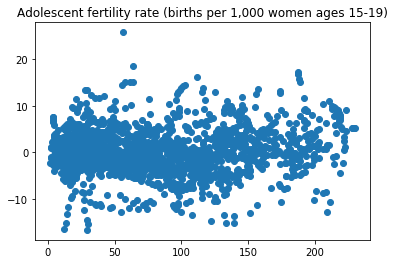

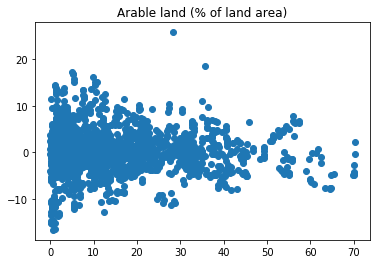

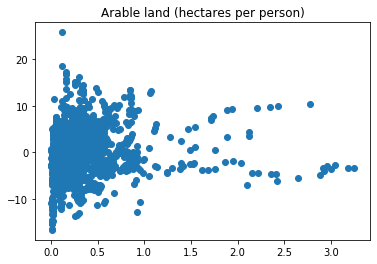

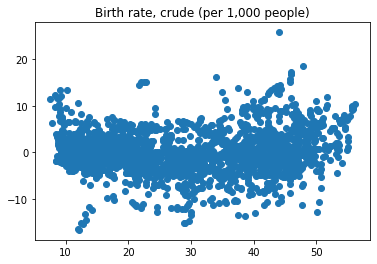

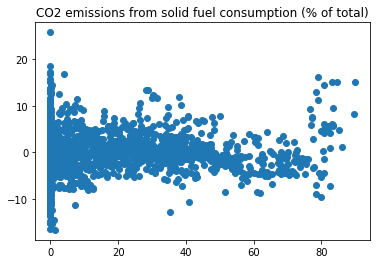

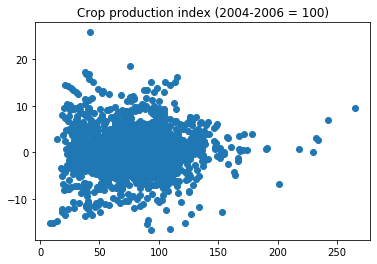

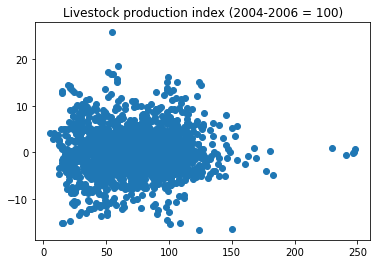

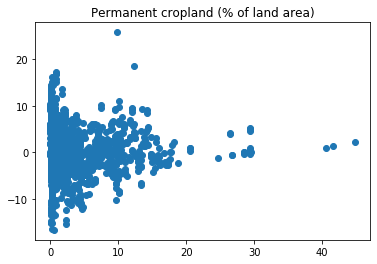

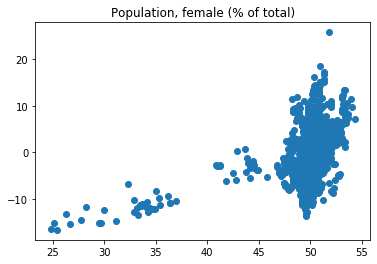

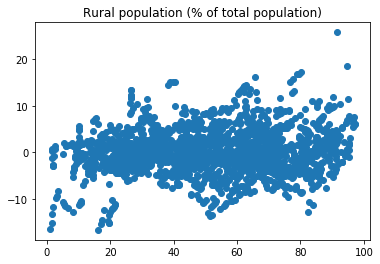

In [35]:
for index in range(0,10):
    residual(X_test.iloc[:,index], residuals,X_test.columns[index],'MLPRegression')